In [6]:
import pickle
import numpy as np

In [7]:
with open('../UPDATED_NLP_COURSE/06-Deep-Learning/train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [8]:
with open('../UPDATED_NLP_COURSE/06-Deep-Learning/test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [9]:
type(test_data)

list

In [10]:
type(train_data)

list

In [11]:
len(train_data)

10000

In [12]:
len(test_data)

1000

In [13]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [14]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [15]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [16]:
train_data[0][2]

'no'

In [17]:
all_data = test_data + train_data

In [18]:
len(all_data)

11000

In [19]:
vocab = set()

for story, question, answer, in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [20]:
vocab.add('no')

In [21]:
vocab.add('yes')

In [22]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [23]:
vocab_len = len(vocab) + 1

In [24]:
vocab_len

38

In [25]:
# LONGEST STORY
all_story_lens = [len(data[0]) for data in all_data]

In [26]:
max_story_len = max(all_story_lens)

In [27]:
max_question_len = max([len(data[1]) for data in all_data])

In [28]:
max_question_len

6

In [72]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [73]:
vocab_size = len(vocab) + 1

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [74]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [75]:
tokenizer.word_index

{'moved': 1,
 '.': 2,
 'grabbed': 3,
 'no': 4,
 'milk': 5,
 'in': 6,
 'to': 7,
 'bedroom': 8,
 'john': 9,
 'office': 10,
 'travelled': 11,
 'yes': 12,
 'is': 13,
 'sandra': 14,
 'apple': 15,
 'the': 16,
 'there': 17,
 'hallway': 18,
 'down': 19,
 'discarded': 20,
 'dropped': 21,
 'put': 22,
 'garden': 23,
 'kitchen': 24,
 'up': 25,
 '?': 26,
 'daniel': 27,
 'picked': 28,
 'bathroom': 29,
 'took': 30,
 'back': 31,
 'football': 32,
 'mary': 33,
 'left': 34,
 'journeyed': 35,
 'went': 36,
 'got': 37}

In [32]:
train_story_text = []
train_question_text = []
train_answers = []

In [33]:
for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [34]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [35]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [36]:
len(train_story_seq)

10000

In [37]:
len(train_story_text)

10000

In [38]:
# train_story_seq

In [39]:
def vectorize_stories(data, word_index = tokenizer.word_index, max_story_len = max_story_len, max_question_len = max_question_len):
    
    # STORIES
    X = []
    # QUESTIONS
    Xq = []
    #Y CORRECT ANSWER (yes/no)
    Y = []
    
    for story, query, answer in data:
        # for each story
        # [23, 14, ....]
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        
        y = np.zeros(len(word_index) + 1)
        
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X, maxlen = max_story_len), pad_sequences(Xq, maxlen = max_question_len), np.array(Y))

In [77]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [78]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [79]:
inputs_test

array([[ 0,  0,  0, ..., 16,  8,  2],
       [ 0,  0,  0, ..., 16, 23,  2],
       [ 0,  0,  0, ..., 16, 23,  2],
       ...,
       [ 0,  0,  0, ..., 16, 15,  2],
       [ 0,  0,  0, ..., 16, 23,  2],
       [ 0,  0,  0, ..., 15, 17,  2]])

In [80]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
tokenizer.word_index['yes']

12

In [82]:
tokenizer.word_index['no']

4

In [83]:
sum(answers_test)

array([  0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [2]:
from keras.models import Sequential, Model

In [3]:
from keras.layers.embeddings import Embedding

In [4]:
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [47]:
# PLACEHOLDER shape = (max_story_len, batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [49]:
# vocab len
vocab_size = len(vocab) + 1

In [84]:
# INPUT ENCODER M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_size, output_dim = 64))
input_encoder_m.add(Dropout(0.3))

# OUTPUT
# (samples, story_maxlen, embedding_dim)

In [85]:
# INPUT ENCODER C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_size, output_dim = max_question_len))
input_encoder_c.add(Dropout(0.3))

# OUTPUT
# (samples, story_maxlen, max_question_len)

In [86]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_size, output_dim = 64, input_length = max_question_len))
question_encoder.add(Dropout(0.3))

# OUTPUT
# (samples, query_maxlen, embedding_dim)

In [87]:
# ENCODED <--- ENCODER(INPUT) 
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [88]:
match = dot([input_encoded_m, question_encoded], axes = (2,2))
match = Activation('softmax')(match)

In [89]:
response = add([match, input_encoded_c])
response = Permute((2, 1))(response)

In [90]:
answer = concatenate([response, question_encoded])

In [91]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 6, 220) dtype=float32>

In [92]:
answer = LSTM(32)(answer)

In [93]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer) # (samples, vocab_size) # YES/NO 0000

In [94]:
answer = Activation('softmax')(answer)

In [95]:
model = Model([input_sequence, question], answer)

In [96]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

In [97]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_13 (Sequential)      multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_15 (Sequential)      (None, 6, 64)        2432        input_2[0][0]                    
____________________________________________________________________________________________

In [201]:
history = model.fit([inputs_train, queries_train], answers_train, batch_size = 32, epochs = 10, validation_data = ([inputs_test, queries_test], answers_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/10
10000/10000 [==============================] - 2s 243us/step - loss: 0.0245 - accuracy: 0.9936 - val_loss: 0.2069 - val_accuracy: 0.9690
Epoch 2/10
10000/10000 [==============================] - 2s 235us/step - loss: 0.0282 - accuracy: 0.9935 - val_loss: 0.2005 - val_accuracy: 0.9660
Epoch 3/10
10000/10000 [==============================] - 3s 263us/step - loss: 0.0269 - accuracy: 0.9936 - val_loss: 0.2226 - val_accuracy: 0.9610
Epoch 4/10
10000/10000 [==============================] - 2s 249us/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.1850 - val_accuracy: 0.9670
Epoch 5/10
10000/10000 [==============================] - 3s 270us/step - loss: 0.0225 - accuracy: 0.9943 - val_loss: 0.2171 - val_accuracy: 0.9660
Epoch 6/10
10000/10000 [==============================] - 3s 279us/step - loss: 0.0233 - accuracy: 0.9942 - val_loss: 0.1629 - val_accuracy: 0.9640
Epoch 7/10
10000/10000 [==============================] - 3s 25

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


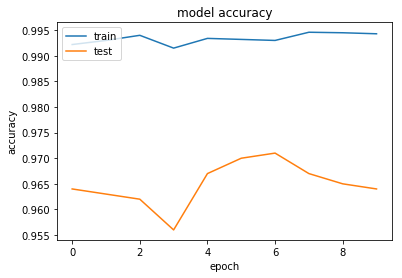

In [181]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [202]:
model.save('mybrandnewmodel.h5')

In [130]:
model.load_weights('../UPDATED_NLP_COURSE/06-Deep-Learning/chatbot_120_epochs.h5')

In [203]:
pred_results = model.predict(([inputs_test, queries_test]))

In [204]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [205]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [206]:
test_data[0][2]

'no'

In [207]:
pred_results.shape

(1000, 38)

In [208]:
pred_results[0]

array([1.07353716e-19, 8.88124824e-20, 9.44701006e-20, 9.34268513e-20,
       1.00000000e+00, 1.27501258e-19, 1.97562895e-27, 1.13841469e-19,
       1.35403237e-19, 8.65449219e-20, 7.90713515e-20, 1.07845036e-19,
       7.16101917e-12, 9.36359341e-20, 1.14407415e-19, 8.92567366e-20,
       8.97826296e-20, 1.02904099e-19, 1.14306654e-19, 1.56703768e-25,
       1.03196959e-19, 1.32806587e-19, 8.37594299e-20, 1.27175801e-19,
       8.13203522e-20, 8.88646724e-20, 8.02200921e-20, 1.13634505e-19,
       1.45766065e-19, 1.28226553e-19, 1.20052186e-19, 1.10847294e-19,
       1.18351554e-19, 8.39468768e-20, 1.01209832e-19, 8.77972087e-20,
       1.01105252e-19, 1.34419241e-19], dtype=float32)

In [209]:
val_max = np.argmax(pred_results[0])

In [210]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [211]:
k

'no'

In [212]:
pred_results[0][val_max]

1.0

In [213]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [258]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [215]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [259]:
my_question = "Is John in the kitchen ?"

In [231]:
my_question.split()

['Did', 'Sandra', 'drop', 'the', 'football', 'in', 'the', 'garden', '?']

In [260]:
mydata = [(my_story.split(), my_question.split(), 'no')]

In [261]:
mydata

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no')]

In [262]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [263]:
my_story

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,
        34, 16, 24,  2, 14, 21, 16, 32,  6, 16, 23,  2]])

In [264]:
my_ans

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [265]:
pred_results = model.predict(([my_story, my_ques]))
pred_results

array([[2.9914676e-14, 2.6501011e-14, 2.7993050e-14, 2.8799242e-14,
        9.9998415e-01, 3.3902226e-14, 5.5808545e-20, 3.0840260e-14,
        3.3873207e-14, 2.7733438e-14, 2.6519216e-14, 3.0395384e-14,
        1.5862748e-05, 2.7177321e-14, 3.2491279e-14, 2.5491802e-14,
        3.0529426e-14, 3.0929798e-14, 3.1086414e-14, 2.5273878e-19,
        2.8940649e-14, 3.1660381e-14, 2.6190118e-14, 3.0554650e-14,
        2.7220639e-14, 2.7029059e-14, 2.6191467e-14, 3.1287052e-14,
        3.6798906e-14, 3.1265575e-14, 3.0339087e-14, 3.0656460e-14,
        3.2496050e-14, 2.4502466e-14, 2.8403197e-14, 2.6427721e-14,
        2.9779073e-14, 3.3080333e-14]], dtype=float32)

In [266]:
val_max = np.argmax(pred_results[0])

In [267]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [268]:
k

'no'

In [269]:
pred_results[0][val_max]

0.99998415